In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.9.0-rc0'

In [3]:
import tensorflow.contrib.layers as lays

In [13]:
def autoencoder(inputs):
    # encoder
    # 32 x 32 x 1   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  8 x 8 x 16
    # 8 x 8 x 16    ->  2 x 2 x 4
    net = lays.conv2d(inputs, 32, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d(net, 16, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d(net, 4, [5, 5], stride=4, padding='SAME')
    # decoder
    # 2 x 2 x 4    ->  8 x 8 x 16
    # 8 x 8 x 16   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  32 x 32 x 1
    net = lays.conv2d_transpose(net, 16, [5, 5], stride=4, padding='SAME')
    net = lays.conv2d_transpose(net, 32, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d_transpose(net, 1, [5, 5], stride=2, padding='SAME', activation_fn=tf.nn.tanh)
    return net

In [14]:
import numpy as np
from skimage import transform
def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs

In [15]:
lr=0.001
ae_inputs = tf.placeholder(tf.float32, (None, 32, 32, 1))  # input to the network (MNIST images)
ae_outputs = autoencoder(ae_inputs)  # create the Autoencoder network
# calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))  # claculate the mean square error loss
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
# initialize the network
init = tf.global_variables_initializer()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/Users/jamesshiely/anaconda3/envs/tf/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/jamesshiely/anaconda3/envs/tf/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Epoch: 1 - cost= 0.10073
Epoch: 1 - cost= 0.10172
Epoch: 1 - cost= 0.10142
Epoch: 1 - cost= 0.09696
Epoch: 1 - cost= 0.09697
Epoch: 1 - cost= 0.09538
Epoch: 1 - cost= 0.09330
Epoch: 1 - cost= 0.09227
Epoch: 1 - cost= 0.08566
Epoch: 1 - cost= 0.08103
Epoch: 1 - cost= 0.08071
Epoch: 1 - cost= 0.08127
Epoch: 1 - cost= 0.07902
Epoch: 1 - cost= 0.07726
Epoch: 1 - cost= 0.07549
Epoch: 1 - cost= 0.07329
Epoch: 1 - cost= 0.07110
Epoch: 1 - cost= 0.06934
Epoch: 1 - cost= 0.06899
Epoch: 1 - cost= 0.06720
Epoch: 1 - cost= 0.06638
Epoch: 1 - cost= 0.06499
Epoch: 1 - cost= 0.06381
Epoch: 1 - cost= 0.06383
Epoch: 1 - cost= 0.06289
Epoch: 1 - cost= 0.06064
Epoch: 1 - cost= 0.06066
Epoch: 1 - cost= 0.06199
Epoch: 1 - cost= 0.05906
Epoch: 1 - cost= 0.06010
Epoch: 1 - cost= 0.05856
Epoch: 1 - cost= 0.06006
Epoch: 1 - cost= 0.05878
Epoch: 1 - cost= 0.05784
Epoch: 1 - cost= 0.05739
Epoch: 1 - cost= 0.05698
Epoch: 1 - cost= 0.05575
Epoch: 1 - cost= 0.05447
Epoch: 1 - cost= 0.05562
Epoch: 1 - cost= 0.05565


Epoch: 3 - cost= 0.01827
Epoch: 3 - cost= 0.01914
Epoch: 4 - cost= 0.01838
Epoch: 4 - cost= 0.01803
Epoch: 4 - cost= 0.01777
Epoch: 4 - cost= 0.01848
Epoch: 4 - cost= 0.01809
Epoch: 4 - cost= 0.01775
Epoch: 4 - cost= 0.01792
Epoch: 4 - cost= 0.01789
Epoch: 4 - cost= 0.01827
Epoch: 4 - cost= 0.01790
Epoch: 4 - cost= 0.01801
Epoch: 4 - cost= 0.01829
Epoch: 4 - cost= 0.01849
Epoch: 4 - cost= 0.01808
Epoch: 4 - cost= 0.01777
Epoch: 4 - cost= 0.01831
Epoch: 4 - cost= 0.01743
Epoch: 4 - cost= 0.01755
Epoch: 4 - cost= 0.01775
Epoch: 4 - cost= 0.01819
Epoch: 4 - cost= 0.01798
Epoch: 4 - cost= 0.01752
Epoch: 4 - cost= 0.01770
Epoch: 4 - cost= 0.01779
Epoch: 4 - cost= 0.01791
Epoch: 4 - cost= 0.01728
Epoch: 4 - cost= 0.01722
Epoch: 4 - cost= 0.01765
Epoch: 4 - cost= 0.01750
Epoch: 4 - cost= 0.01757
Epoch: 4 - cost= 0.01801
Epoch: 4 - cost= 0.01839
Epoch: 4 - cost= 0.01788
Epoch: 4 - cost= 0.01773
Epoch: 4 - cost= 0.01758
Epoch: 4 - cost= 0.01768
Epoch: 4 - cost= 0.01728
Epoch: 4 - cost= 0.01713


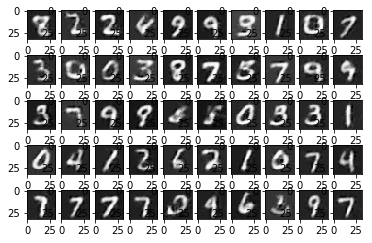

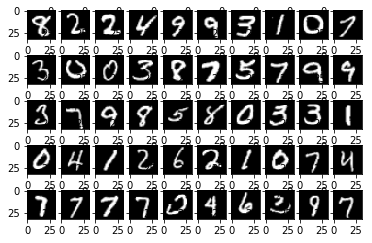

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
batch_size = 500  # Number of samples in each batch
epoch_num = 5     # Number of epochs to train the network
lr = 0.001        # Learning rate
# read MNIST dataset
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
# calculate the number of batches per epoch
batch_per_ep = mnist.train.num_examples // batch_size
with tf.Session() as sess:
    sess.run(init)
    for ep in range(epoch_num):  # epochs loop
        for batch_n in range(batch_per_ep):  # batches loop
            batch_img, batch_label = mnist.train.next_batch(batch_size)  # read a batch
            batch_img = batch_img.reshape((-1, 28, 28, 1))               # reshape each sample to an (28, 28) image
            batch_img = resize_batch(batch_img)                          # reshape the images to (32, 32)
            _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img})
            print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))
    # test the trained network
    batch_img, batch_label = mnist.test.next_batch(50)
    batch_img = resize_batch(batch_img)
    recon_img = sess.run([ae_outputs], feed_dict={ae_inputs: batch_img})[0]
    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(recon_img[i, ..., 0], cmap='gray')
    plt.figure(2)
    plt.title('Input Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(batch_img[i, ..., 0], cmap='gray')
    plt.show()

In [11]:
import matplotlib.pyplot as plt

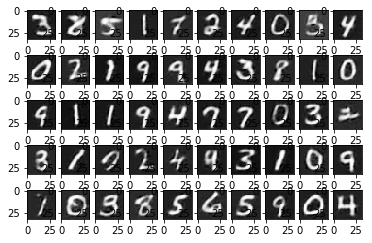

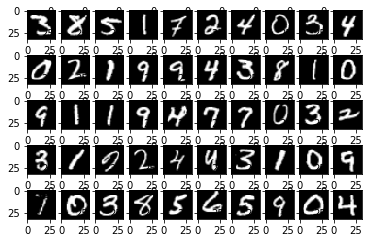

In [12]:
plt.figure(1)
plt.title('Reconstructed Images')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap='gray')
plt.figure(2)
plt.title('Input Images')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(batch_img[i, ..., 0], cmap='gray')
plt.show()